# Careful look into the results from the reference run

August, 2019

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import cmocean
from matplotlib.patches import ConnectionPatch
import matplotlib as mpl
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pickle

import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar

%matplotlib notebook

In [4]:
ref_folder = '/data/brogalla/run_storage/reference/'

Mn_model1  = nc.Dataset(ref_folder+'ANHA12_EXH006_2002_monthly.nc')
Mn_model2  = nc.Dataset(ref_folder+'ANHA12_EXH006_2003_monthly.nc')
Mn_model3  = nc.Dataset(ref_folder+'ANHA12_EXH006_2004_monthly.nc')
Mn_model4  = nc.Dataset(ref_folder+'ANHA12_EXH006_2005_monthly.nc')
Mn_model5  = nc.Dataset(ref_folder+'ANHA12_EXH006_2006_monthly.nc')
Mn_model6  = nc.Dataset(ref_folder+'ANHA12_EXH006_2007_monthly.nc')
Mn_model7  = nc.Dataset(ref_folder+'ANHA12_EXH006_2008_monthly.nc')
Mn_model8  = nc.Dataset(ref_folder+'ANHA12_EXH006_2009_monthly.nc')
Mn_model9  = nc.Dataset(ref_folder+'ANHA12_EXH006_2010_monthly.nc')
Mn_model10 = nc.Dataset(ref_folder+'ANHA12_EXH006_2011_monthly.nc')
Mn_model11 = nc.Dataset(ref_folder+'ANHA12_EXH006_2012_monthly.nc')
Mn_model12 = nc.Dataset(ref_folder+'ANHA12_EXH006_2013_monthly.nc')
Mn_model13 = nc.Dataset(ref_folder+'ANHA12_EXH006_2014_monthly.nc')
Mn_model14 = nc.Dataset(ref_folder+'ANHA12_EXH006_2015_monthly.nc')

In [5]:
Mn_model1  = np.array(Mn_model1.variables['dissolmn'])
Mn_model2  = np.array(Mn_model2.variables['dissolmn'])
Mn_model3  = np.array(Mn_model3.variables['dissolmn'])
Mn_model4  = np.array(Mn_model4.variables['dissolmn'])
Mn_model5  = np.array(Mn_model5.variables['dissolmn'])
Mn_model6  = np.array(Mn_model6.variables['dissolmn'])
Mn_model7  = np.array(Mn_model7.variables['dissolmn'])
Mn_model8  = np.array(Mn_model8.variables['dissolmn'])
Mn_model9  = np.array(Mn_model9.variables['dissolmn'])
Mn_model10 = np.array(Mn_model10.variables['dissolmn'])
Mn_model11 = np.array(Mn_model11.variables['dissolmn'])
Mn_model12 = np.array(Mn_model12.variables['dissolmn'])
Mn_model13 = np.array(Mn_model13.variables['dissolmn'])
# Mn_model14 = np.array(Mn_model14.variables['dissolmn'])

Land mask:

In [6]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
tmask = tmask[:,:,:,:]
c     = nc.Dataset('/data/brogalla/run_storage/reference/ANHA12_EXH006_2002_monthly.nc', 'r')
depth = np.array(c.variables['deptht'])

Stations:

In [7]:
stni = [104-1, 100, 91, 175, 175, 233, 214, 352, 242, 458, 508, 547]
stnj = [370, 365, 353, 311, 326, 313, 281, 281, 364, 332, 384, 457]

In [8]:
colors=['#e6e6fa', '#ffe4e1', '#faebd7', '#f5f5dc', '#dcedc1', '#b6fcd5', \
       '#f0ffff', '#c6e2ff', '#c0d6e4', '#468499', '#bebebe', '#696969', \
       '#695b51', '#4e021b']

cobs = '#ff1744'

name  =['CAA1', 'CAA2', 'CAA3', 'CAA4', 'CAA5', 'CAA6', 'CAA7', 'CAA8', 'CAA9', \
       'CB1', 'CB2', 'CB3']

In [9]:
Mn_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Mn_Integrated_Data_UBC-UVic_4-17-19.csv')
dMn_CB1 = np.array(Mn_data['CB1'].dropna()[1:].astype('float'))
dMn_CB2 = np.array(Mn_data['CB2'].dropna()[1:].astype('float'))
dMn_CB3 = np.array(Mn_data['CB3'].dropna()[1:].astype('float'))
dMn_CAA1 = np.array(Mn_data['CAA1'].dropna()[1:].astype('float'))
dMn_CAA2 = np.array(Mn_data['CAA2'].dropna()[1:].astype('float'))
dMn_CAA3 = np.array(Mn_data['CAA3'].dropna()[1:].astype('float'))
dMn_CAA4 = np.array(Mn_data['CAA4'].dropna()[1:].astype('float'))
dMn_CAA5 = np.array(Mn_data['CAA5'].dropna()[1:].astype('float'))
dMn_CAA6 = np.array(Mn_data['CAA6'].dropna()[1:].astype('float'))
dMn_CAA7 = np.array(Mn_data['CAA7'].dropna()[1:].astype('float'))
dMn_CAA8 = np.array(Mn_data['CAA8'].dropna()[1:].astype('float'))
dMn_CAA9 = np.array(Mn_data['CAA9'].dropna()[1:].astype('float'))

In [10]:
depth_CB1 = np.array(Mn_data['Depth.14'].dropna())
depth_CB2 = np.array(Mn_data['Depth.15'].dropna())
depth_CB3 = np.array(Mn_data['Depth.16'].dropna())
depth_CAA1 = np.array(Mn_data['Depth.5'].dropna())
depth_CAA2 = np.array(Mn_data['Depth.6'].dropna())
depth_CAA3 = np.array(Mn_data['Depth.7'].dropna())
depth_CAA4 = np.array(Mn_data['Depth.8'].dropna())
depth_CAA5 = np.array(Mn_data['Depth.9'].dropna())
depth_CAA6 = np.array(Mn_data['Depth.10'].dropna())
depth_CAA7 = np.array(Mn_data['Depth.11'].dropna())
depth_CAA8 = np.array(Mn_data['Depth.12'].dropna())
depth_CAA9 = np.array(Mn_data['Depth.13'].dropna())

<IPython.core.display.Javascript object>


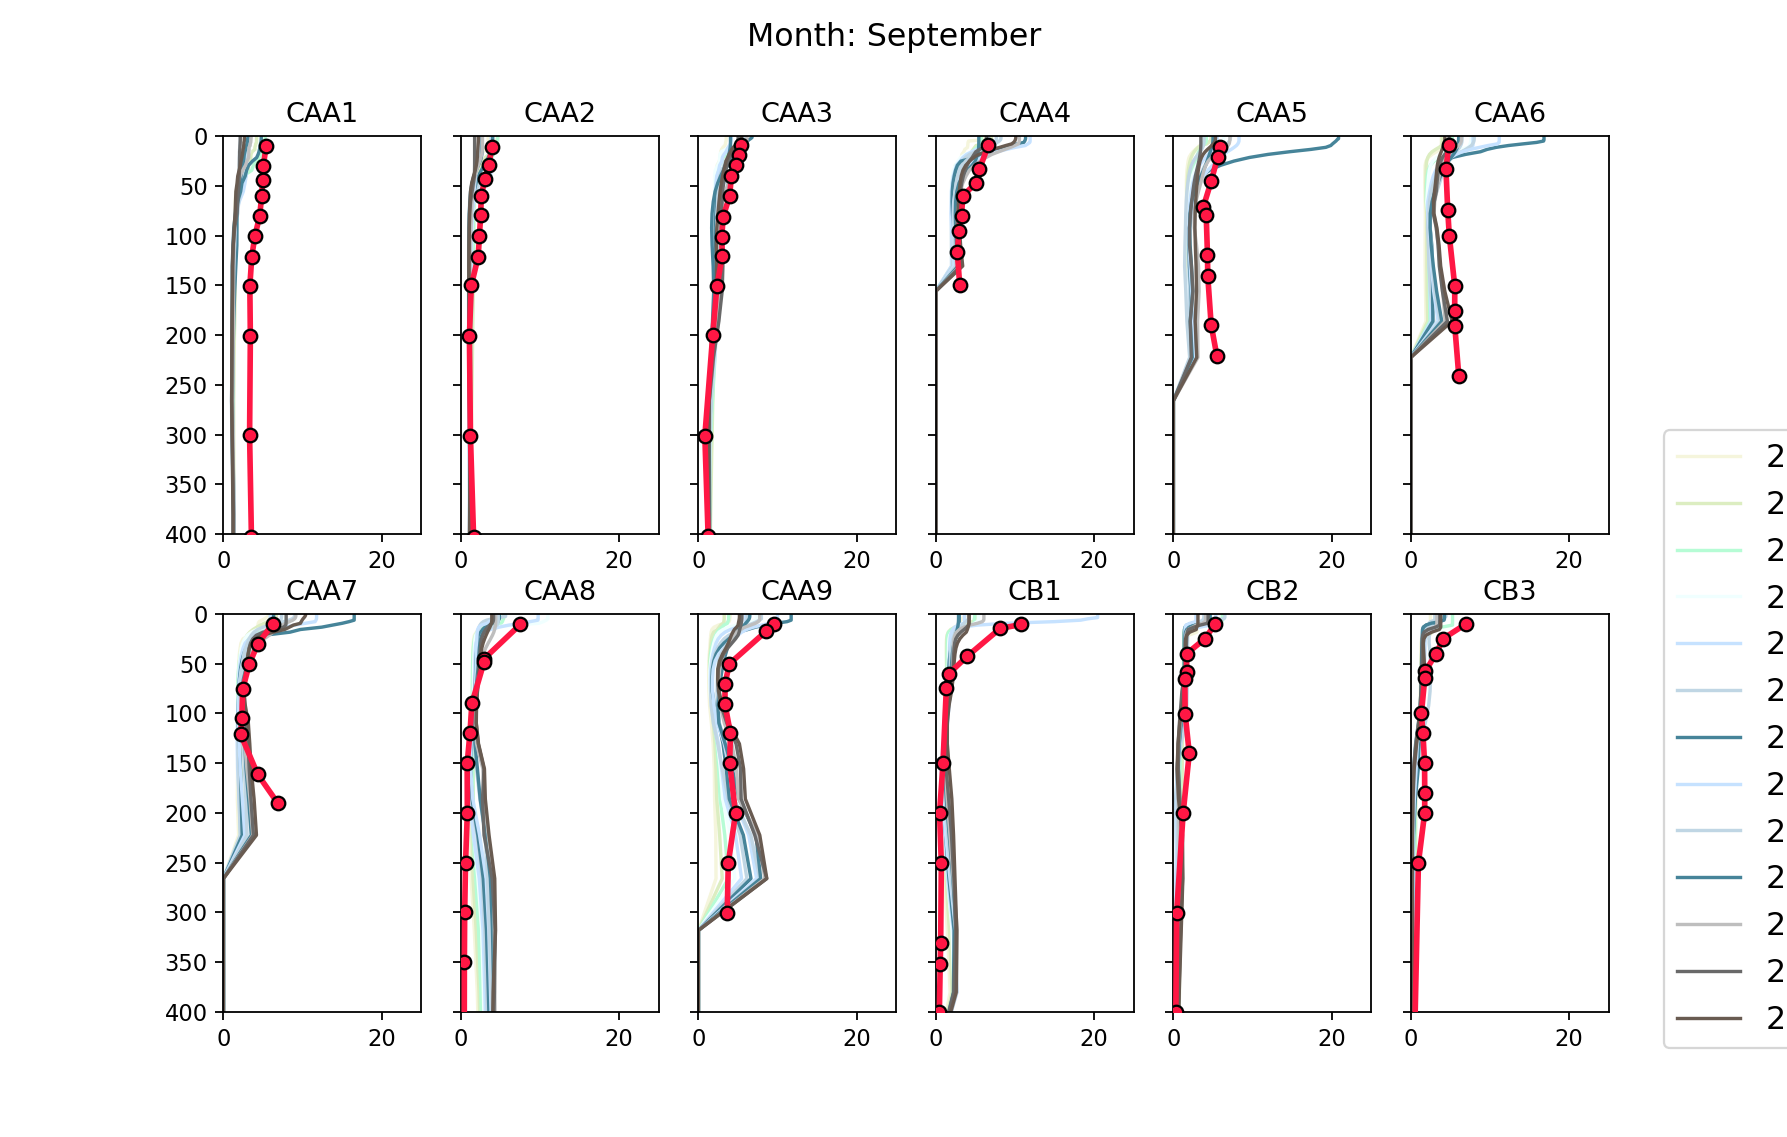

Text(0.5, 0.98, 'Month: September')

In [12]:
fig = plt.subplots(figsize=(11,7))

ax2 = plt.subplot2grid((2, 6), (0, 0))
ax3 = plt.subplot2grid((2, 6), (0, 1))
ax4 = plt.subplot2grid((2, 6), (0, 2))
ax5 = plt.subplot2grid((2, 6), (0, 3))
ax6 = plt.subplot2grid((2, 6), (0, 4))
ax7 = plt.subplot2grid((2, 6), (0, 5))
ax8 = plt.subplot2grid((2, 6), (1, 0))
ax9 = plt.subplot2grid((2, 6), (1, 1))
ax10 = plt.subplot2grid((2, 6), (1, 2))
ax11 = plt.subplot2grid((2, 6), (1, 3))
ax12 = plt.subplot2grid((2, 6), (1, 4))
ax13 = plt.subplot2grid((2, 6), (1, 5))

mth=8
stn=0
for ax in [ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13]:
    ax.invert_yaxis()
    ax.set_ylim([400, 0])
    ax.set_xlim([0, 25])

    ax.plot(Mn_model1[mth,0,:,stni[stn], stnj[stn]]*10**9, depth, c=colors[3], label='2002')
    ax.plot(Mn_model2[mth,0,:,stni[stn], stnj[stn]]*10**9, depth, c=colors[4], label='2003')
    ax.plot(Mn_model3[mth,0,:,stni[stn], stnj[stn]]*10**9, depth, c=colors[5], label='2004')
    ax.plot(Mn_model4[mth,0,:,stni[stn], stnj[stn]]*10**9, depth, c=colors[6], label='2005')
    ax.plot(Mn_model5[mth,0,:,stni[stn], stnj[stn]]*10**9, depth, c=colors[7], label='2006')
    ax.plot(Mn_model6[mth,0,:,stni[stn], stnj[stn]]*10**9, depth, c=colors[8], label='2007')
    ax.plot(Mn_model7[mth,0,:,stni[stn], stnj[stn]]*10**9, depth, c=colors[9], label='2008')
    ax.plot(Mn_model8[mth,0,:,stni[stn], stnj[stn]]*10**9, depth, c=colors[7], label='2009')
    ax.plot(Mn_model9[mth,0,:,stni[stn], stnj[stn]]*10**9, depth, c=colors[8], label='2010')
    ax.plot(Mn_model10[mth,0,:,stni[stn], stnj[stn]]*10**9, depth, c=colors[9], label='2011')
    ax.plot(Mn_model11[mth,0,:,stni[stn], stnj[stn]]*10**9, depth, c=colors[10], label='2012')
    ax.plot(Mn_model12[mth,0,:,stni[stn], stnj[stn]]*10**9, depth, c=colors[11], label='2013')
    ax.plot(Mn_model13[mth,0,:,stni[stn], stnj[stn]]*10**9, depth, c=colors[12], label='2014')
#     ax.plot(Mn_model14[mth,0,:,stni[stn], stnj[stn]]*10**9, depth, c=colors[13], label='2015')
    
    ax.set_title(name[stn])
    stn+=1
    
ax3.yaxis.set_ticklabels([]); ax4.yaxis.set_ticklabels([]); ax5.yaxis.set_ticklabels([]);
ax6.yaxis.set_ticklabels([]); ax7.yaxis.set_ticklabels([]); ax9.yaxis.set_ticklabels([]);
ax10.yaxis.set_ticklabels([]); ax11.yaxis.set_ticklabels([]); ax12.yaxis.set_ticklabels([]);
ax13.yaxis.set_ticklabels([])
    
# observations:
ax2.plot(dMn_CAA1, depth_CAA1, zorder=3, linestyle='-', linewidth=2.5, color=cobs)
ax2.scatter(dMn_CAA1, depth_CAA1, zorder=4, edgecolors='k', color=cobs)
ax3.plot(dMn_CAA2, depth_CAA2, zorder=3, linestyle='-', linewidth=2.5, color=cobs)
ax3.scatter(dMn_CAA2, depth_CAA2, zorder=4, edgecolors='k', color=cobs)
ax4.plot(dMn_CAA3, depth_CAA3, zorder=3, linestyle='-', linewidth=2.5, color=cobs)
ax4.scatter(dMn_CAA3, depth_CAA3, zorder=4, edgecolors='k', color=cobs)
ax5.plot(dMn_CAA4, depth_CAA4, zorder=3, linestyle='-', linewidth=2.5, color=cobs)
ax5.scatter(dMn_CAA4, depth_CAA4, zorder=4, edgecolors='k', color=cobs)
ax6.plot(dMn_CAA5, depth_CAA5, zorder=3, linestyle='-', linewidth=2.5, color=cobs)
ax6.scatter(dMn_CAA5, depth_CAA5, zorder=4, edgecolors='k', color=cobs)
ax7.plot(dMn_CAA6, depth_CAA6, zorder=3, linestyle='-', linewidth=2.5, color=cobs)
ax7.scatter(dMn_CAA6, depth_CAA6, zorder=4, edgecolors='k', color=cobs)
ax8.plot(dMn_CAA7, depth_CAA7, zorder=3, linestyle='-', linewidth=2.5, color=cobs)
ax8.scatter(dMn_CAA7, depth_CAA7, zorder=4, edgecolors='k', color=cobs)
ax9.plot(dMn_CAA8, depth_CAA8, zorder=3, linestyle='-', linewidth=2.5, color=cobs)
ax9.scatter(dMn_CAA8, depth_CAA8, zorder=4, edgecolors='k', color=cobs)
ax10.plot(dMn_CAA9, depth_CAA9, zorder=3, linestyle='-', linewidth=2.5, color=cobs)
ax10.scatter(dMn_CAA9, depth_CAA9, zorder=4, edgecolors='k', color=cobs)

ax11.plot(dMn_CB1, depth_CB1, zorder=3, linestyle='-', linewidth=2.5, color=cobs)
ax11.scatter(dMn_CB1, depth_CB1, zorder=4, edgecolors='k', color=cobs)
ax12.plot(dMn_CB2, depth_CB2, zorder=3, linestyle='-', linewidth=2.5, color=cobs)
ax12.scatter(dMn_CB2, depth_CB2, zorder=4, edgecolors='k', color=cobs)
ax13.plot(dMn_CB3, depth_CB3, zorder=3, linestyle='-', linewidth=2.5, color=cobs)
ax13.scatter(dMn_CB3, depth_CB3, zorder=4, edgecolors='k', color=cobs)

ax13.legend(bbox_to_anchor=(1.20, 1.5), fontsize=14)

fig[0].suptitle('Month: September', fontsize=14)

# fig[0].savefig('/ocean/brogalla/GEOTRACES/figures/reference-run_assessment1.png', bbox_inches='tight')

# Figure out reason for large plume originating nearby King Boothia Island

In [13]:
land_color = "#8b7765"

# load bathymetry file:
mesh     = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon = mesh.variables['nav_lon']
mesh_lat = mesh.variables['nav_lat']
mesh_bathy = mesh.variables['hdept'][0]
mesh_lon   = np.array(mesh_lon)
mesh_lat   = np.array(mesh_lat)
mesh_bathy = np.array(mesh_bathy)
tmask      = np.array(mesh.variables['tmask'][0,:,:,:])
Z_masked   = np.ma.masked_where((tmask > 0.1), tmask) 
e3t0       = np.array(mesh.variables['e3t_0'])
nav_lev    = np.array(mesh.variables['nav_lev'])

c = nc.Dataset('/data/brogalla/run_storage/reference/ANHA12_EXH006_2002_monthly.nc', 'r')

# Load structure from sample dataset:
lat_model = c.variables['nav_lat']
lon_model = c.variables['nav_lon']
depths_model = c.variables['deptht']
lat_model = np.array(lat_model)
lon_model = np.array(lon_model)
depths_model = np.array(depths_model)

bathy      = mesh_bathy[1480:2050,160:800]

Bathymetry depth in that region: around 6-10 meters

<IPython.core.display.Javascript object>


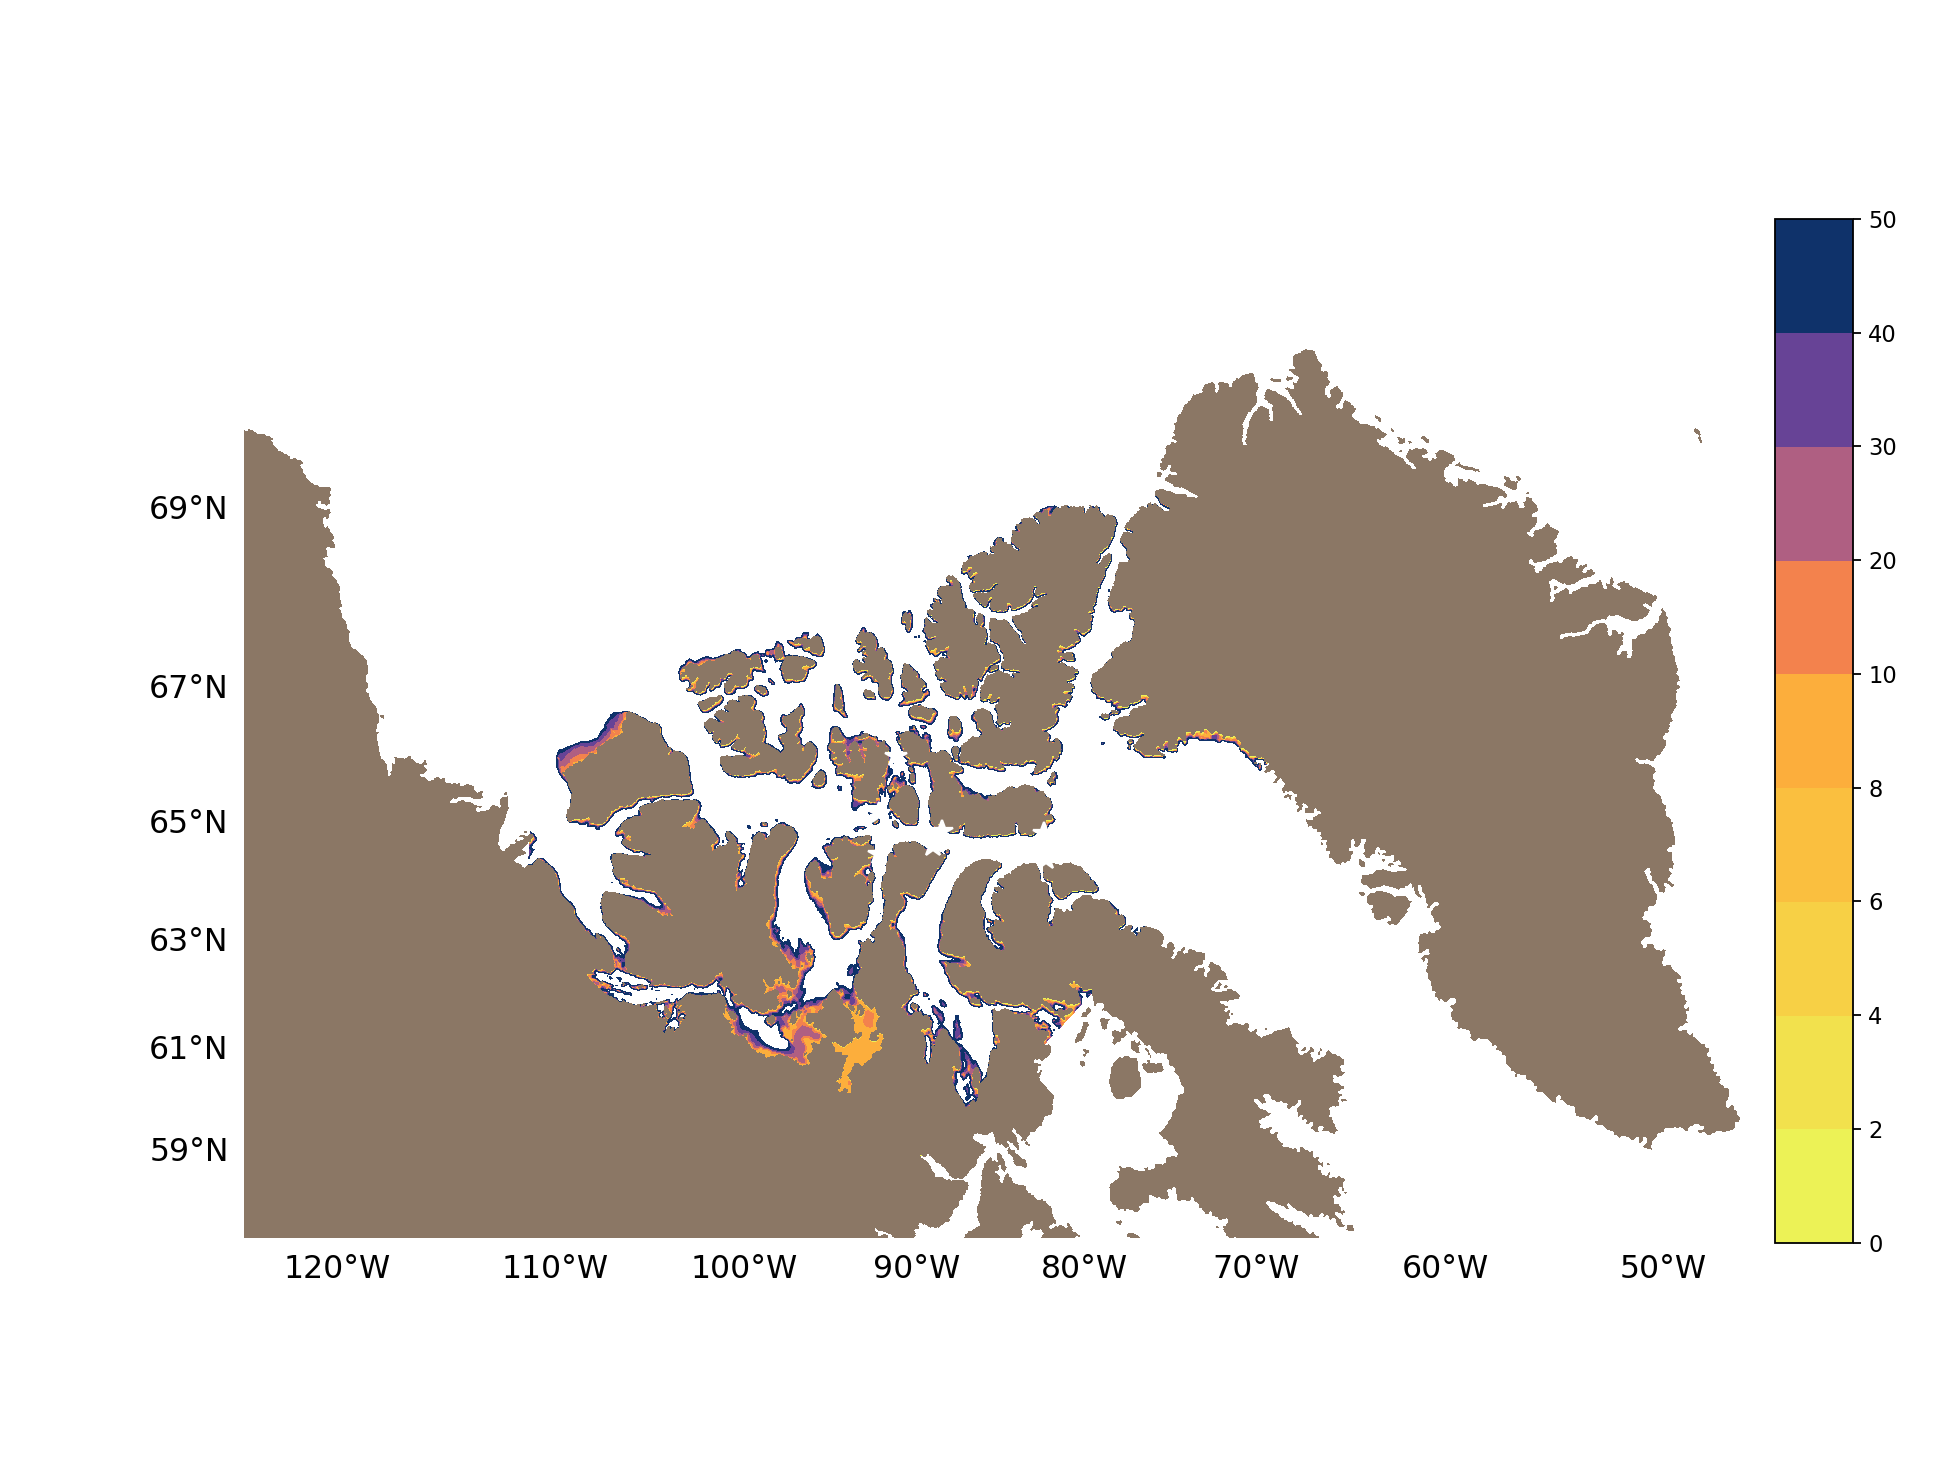

In [14]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/mn-reference.pickle','rb'))
#-----------------------------------------------------------------------------

x, y = proj1(lon_model, lat_model)

cbar = proj1.contourf(x, y, bathy, levels=[0,2,4,6,8,10,20,30,40,50], cmap=cmocean.cm.thermal_r)

x_stn, y_stn = proj1([lon_model[104,370], lon_model[100,365], lon_model[91,353],  lon_model[175,311], \
                      lon_model[175,326], lon_model[233,313], lon_model[214,281], lon_model[352,281], \
                      lon_model[242,364], lon_model[458,332], lon_model[508,384], lon_model[547,457]], \
                     [lat_model[104,370], lat_model[100,365], lat_model[91,353],  lat_model[175,311], \
                      lat_model[175,326], lat_model[233,313], lat_model[214,281], lat_model[352,281], \
                      lat_model[242,364], lat_model[458,332], lat_model[508,384], lat_model[547,457]])

proj1.plot(x_stn, y_stn, '*w', markersize=10)

cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/bathy-shallow-boothia.png', bbox_inches='tight')

Runoff in that region:

In [15]:
month=8

In [16]:
c = nc.Dataset('/ocean/brogalla/GEOTRACES/data/runoff/'+ \
               'ANHA12_runoff_monthly_combined_Dai_Trenberth_Bamber_y2002.nc','r')
lon_rf  = np.array(c.variables['nav_lon'])
lat_rf  = np.array(c.variables['nav_lat'])
rf      = np.array(c.variables['runoff'])

In [17]:
classif    = nc.Dataset('/ocean/brogalla/GEOTRACES/data/rivers/river_input-base-case.nc','r')
dmn_rivers = classif.variables['dmn_rivers']

In [18]:
runoff  = np.sum(rf,axis=0)*3600*24*365 # kg/m2 in a year

In [19]:
lon_rf.shape

(2400, 1632)

In [20]:
total=0
for i in range(0,2400):
    for j in range(0,1632):
        if (lon_rf[i,j] > -98) and (lon_rf[i,j] < -96) and (lat_rf[i,j] > 69.5) and (lat_rf[i,j] < 70):
            if np.isnan(runoff[i,j]):
                total = total
            else:
                total = total+runoff[i,j]
            
print(total)
# total   = np.sum(runoff[(lon_rf > -98) and (lon_rf < -96) and (lat_rf > 69.5) and (lat_rf < 70)])

82101795.25


<IPython.core.display.Javascript object>


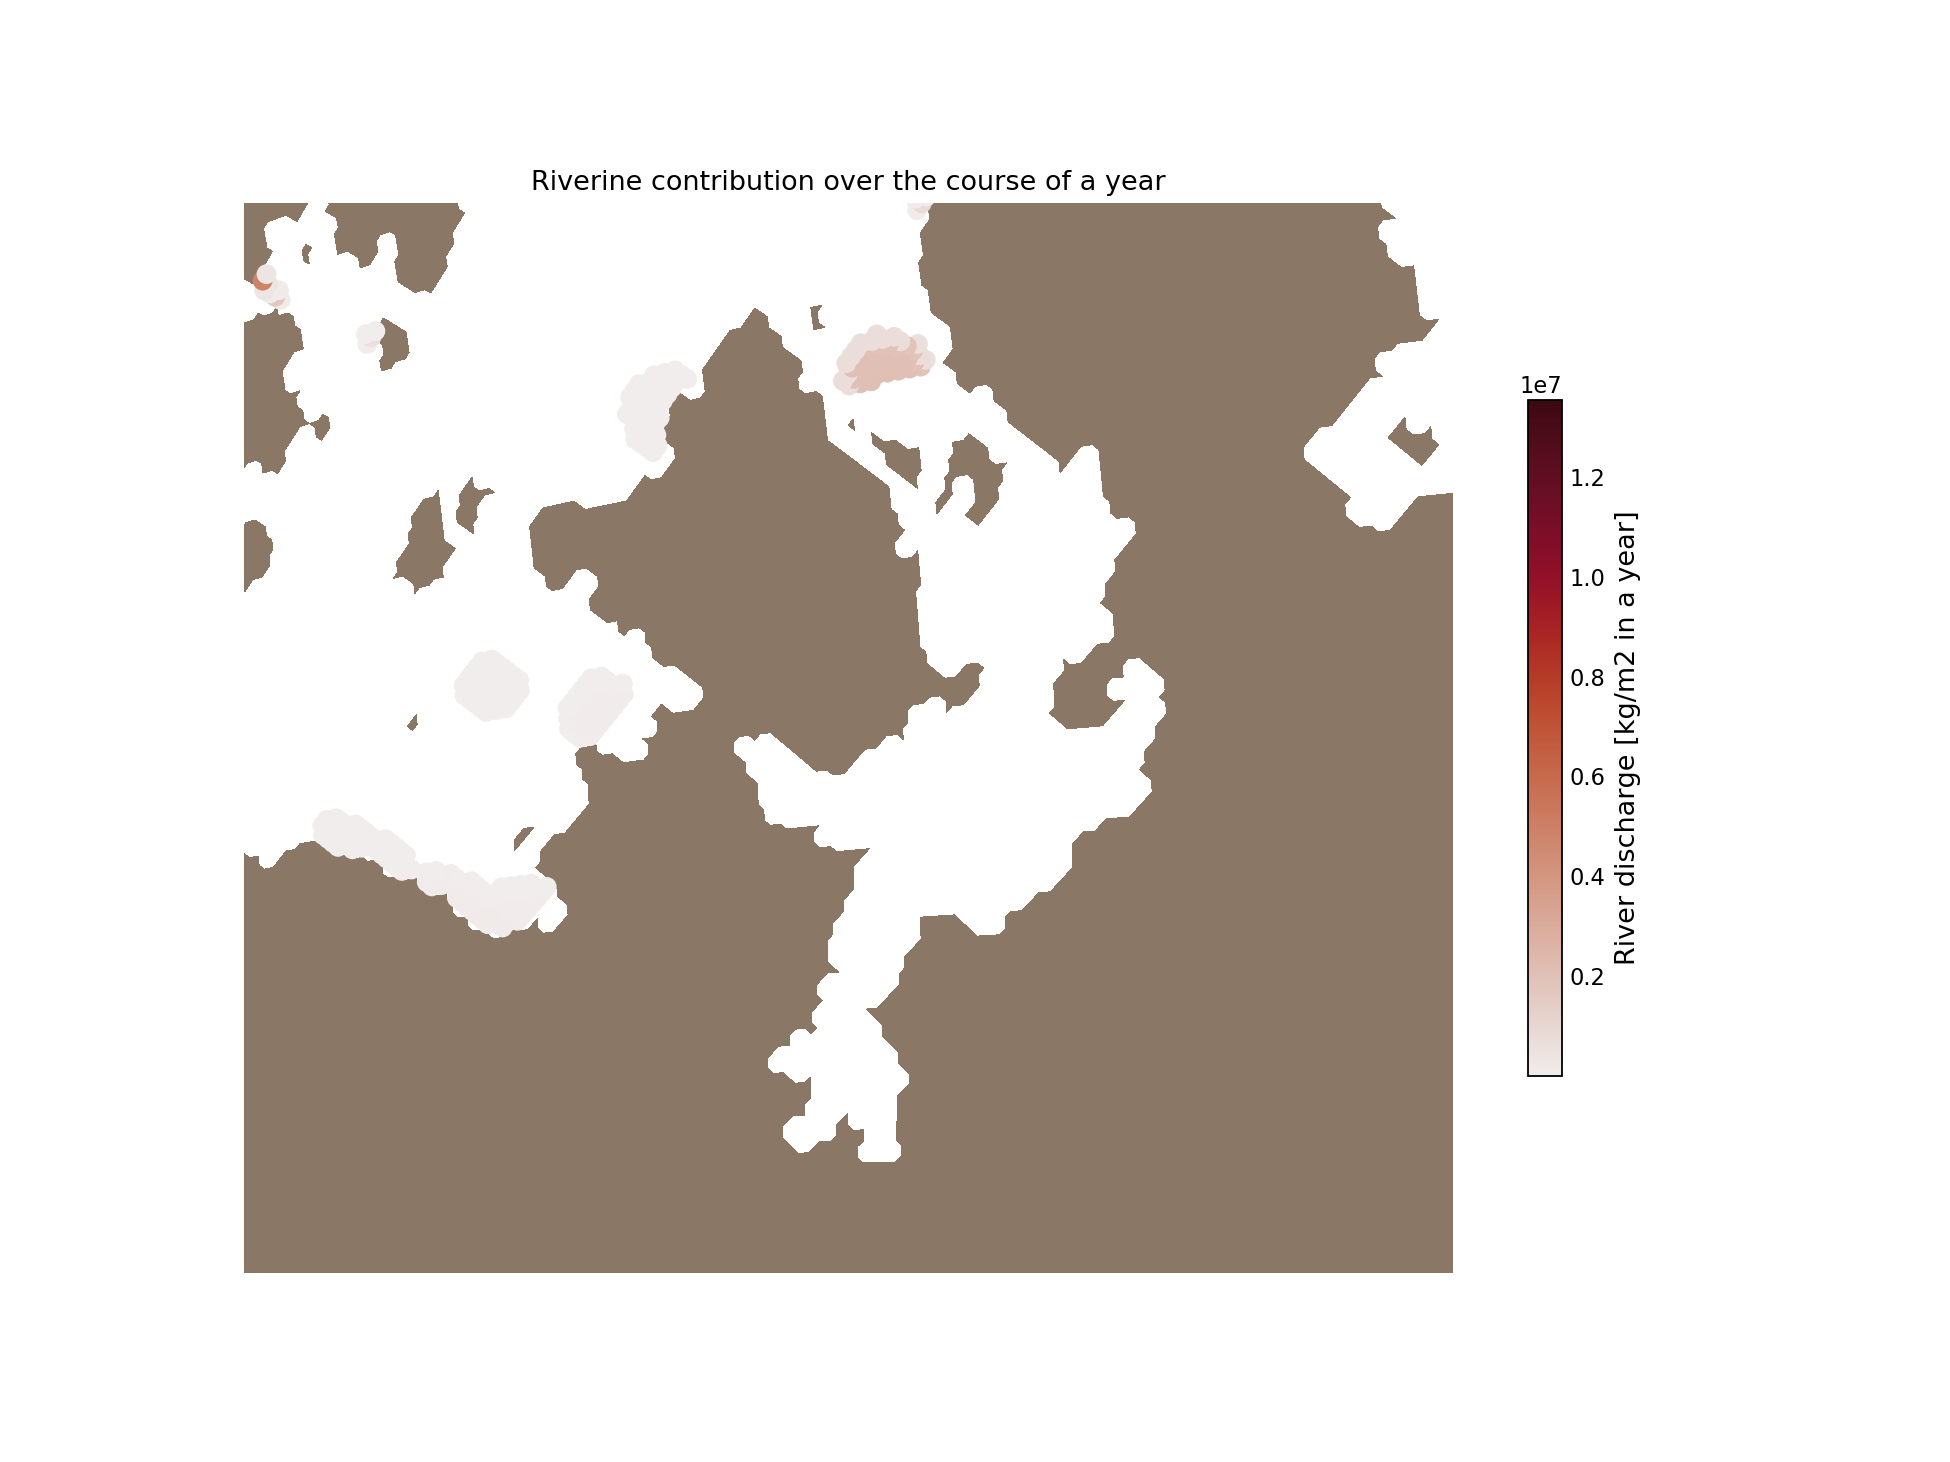

In [22]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/mn-reference.pickle','rb'))

x_rf, y_rf      = proj1(lon_rf, lat_rf)

runoff[runoff == 0.0] = np.nan
lon_rf[runoff == 0.0] = np.nan
lat_rf[runoff == 0.0] = np.nan

CS = proj1.scatter(x_rf[runoff>0], y_rf[runoff>0], \
                  c=runoff[runoff>0], s=60, cmap=cmocean.cm.amp, zorder=3)

# x_box, y_box  = proj1([-98, -98, -96, -96], [69.5, 70, 70, 69.5])
# proj1.plot(x_box, y_box)

CBar = plt.colorbar(CS, shrink=0.6)
CBar.set_label('River discharge [kg/m2 in a year]', fontsize=12)
CBar.ax.tick_params(axis='y', length=0)
ax1.set_title('Riverine contribution over the course of a year');

fig.savefig('/ocean/brogalla/GEOTRACES/figures/boothia-runoff.png', bbox_inches='tight')